In [41]:
import pandas as pd 
import numpy as np
from datetime import datetime

bt2023 = pd.read_csv(r'D:\all_data\weekly butterfly\backtest2023-adaptiveSL-weeklybutter.csv') 
bt2024 = pd.read_csv(r'D:\all_data\weekly butterfly\backtest2024-adaptiveSL-weeklybutter.csv')
bt2022 = pd.read_csv(r'D:\all_data\weekly butterfly\backtest2022-adaptiveSL-weeklybutter.csv')
bt2021 = pd.read_csv(r'D:\all_data\weekly butterfly\backtest2021-adaptiveSL-weeklybutter.csv')
bt2020 = pd.read_csv(r'D:\all_data\weekly butterfly\backtest2020-adaptiveSL-weeklybutter.csv')


In [61]:
btall = [bt2020, bt2021, bt2022, bt2023, bt2024]

#df = pd.concat(btall, ignore_index=True)
df = bt2021
df 

,Unnamed: 0,Datetime,Open,High,Low,Close,ama,rsi,atr,signal,...,m2m3,m2m4,m2m5,m2m6,m2m7,m2m8,totalPL,cumReturns,balance,stoploss
0,0,2021-01-01 09:15:00+05:30,13996.10,14019.50,13994.85,14013.15,13971.608222,52.660703,5.410238,Hold,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,100000.0,NaN
1,1,2021-01-01 09:16:00+05:30,14014.85,14018.55,14008.15,14009.05,13971.683624,52.323103,5.432143,Hold,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,100000.0,-5000.0
2,2,2021-01-01 09:17:00+05:30,14008.05,14013.10,14005.05,14012.70,13971.759821,52.594948,5.449762,Hold,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,100000.0,-5000.0
3,3,2021-01-01 09:18:00+05:30,14013.65,14019.10,14013.65,14016.20,13971.836957,52.853953,5.461429,Hold,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,100000.0,-5000.0
4,4,2021-01-01 09:19:00+05:30,14015.45,14017.80,14011.95,14015.45,13971.914964,52.791850,5.470952,Hold,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,100000.0,-5000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92544,92544,2021-12-31 15:26:00+05:30,17356.10,17359.65,17355.55,17359.25,17319.225098,51.656744,4.810238,Hold,...,-0.3,0.95,0.0,0.0,0.0,0.0,60.0,265.0,172665.0,-4547.5
92545,92545,2021-12-31 15:27:00+05:30,17358.85,17360.50,17356.20,17359.80,17319.420790,51.702101,4.794762,Hold,...,0.0,0.25,0.0,0.0,0.0,0.0,-12.5,252.5,172652.5,-4547.5
92546,92546,2021-12-31 15:28:00+05:30,17359.75,17360.90,17351.10,17353.55,17319.615234,51.154112,4.817143,Hold,...,-0.4,0.45,0.0,0.0,0.0,0.0,12.5,265.0,172665.0,-4547.5
92547,92547,2021-12-31 15:29:00+05:30,17353.45,17365.45,17353.10,17364.25,17319.808960,52.028736,4.865714,Hold,...,0.0,0.70,0.0,0.0,0.0,0.0,30.0,295.0,172695.0,-4547.5


In [62]:
df['Datetime']= pd.to_datetime(df['Datetime'])

In [63]:
# Ensure the 'Datetime' column is parsed correctly and converted to UTC
df['Datetime'] = pd.to_datetime(df['Datetime'], utc=True)



df['day'] = df['Datetime'].dt.day_name()


In [64]:
# df.drop(columns=['Unnamed: 0'], inplace=True)
df['day'] = pd.to_datetime(df['Datetime']).dt.day_name()
# df.drop(columns=['Unnamed: 0.1'], inplace=True)


In [65]:
# create a new column for date 
df['date'] = pd.to_datetime(df['Datetime']).dt.date

In [66]:
df['date']= pd.to_datetime(df['date'])





In [67]:
initial = 100000






In [68]:
# group by date and sum the totalPL
daily_returns = df.groupby('date')['totalPL'].sum().reset_index()

In [69]:
daily_returns.head(50)

,date,totalPL
0,2021-01-01,820.0
1,2021-01-04,570.0
2,2021-01-05,-320.0
3,2021-01-06,657.5
4,2021-01-07,1690.0
5,2021-01-08,4677.5
6,2021-01-11,4342.5
7,2021-01-12,4257.5
8,2021-01-13,-967.5
9,2021-01-14,-387.5


In [70]:
daily_returns['balance'] = initial + daily_returns['totalPL'].cumsum()

In [71]:
# drop rows where total pl is 0
# daily_returns = daily_returns[daily_returns['totalPL'] != 0]
daily_returns['totalPLcumsum'] = daily_returns['totalPL'].cumsum()

In [72]:
#create pct_change column
daily_returns['pct_change'] = daily_returns['balance'].pct_change()



In [73]:
daily_returns


,date,totalPL,balance,totalPLcumsum,pct_change
0,2021-01-01,820.0,100820.0,820.0,NaN
1,2021-01-04,570.0,101390.0,1390.0,0.005654
2,2021-01-05,-320.0,101070.0,1070.0,-0.003156
3,2021-01-06,657.5,101727.5,1727.5,0.006505
4,2021-01-07,1690.0,103417.5,3417.5,0.016613
...,...,...,...,...,...
242,2021-12-27,-5782.5,172400.0,72400.0,-0.032453
243,2021-12-28,0.0,172400.0,72400.0,0.000000
244,2021-12-29,0.0,172400.0,72400.0,0.000000
245,2021-12-30,0.0,172400.0,72400.0,0.000000


In [74]:


# Assuming daily_returns is your DataFrame
daily_returns['date'] = pd.to_datetime(daily_returns['date'])

# Now you can use the .dt accessor
daily_returns['date'] = daily_returns['date'].dt.to_pydatetime()


C:\Users\Aviral Mishra\AppData\Local\Temp\ipykernel_5264\3520149082.py:5: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  daily_returns['date'] = daily_returns['date'].dt.to_pydatetime()


In [75]:
daily_returns['day'] = daily_returns['date'].dt.day_name()

In [76]:
# set index to date
daily_returns.set_index('date', inplace=True)

In [77]:
#save to csv
daily_returns.to_csv(r'D:\AlgoT\data\pyfolio results\pyfoliosignalbutterfly.csv')

In [78]:
daily_returns

,totalPL,balance,totalPLcumsum,pct_change,day
date,,,,,
2021-01-01,820.0,100820.0,820.0,NaN,Friday
2021-01-04,570.0,101390.0,1390.0,0.005654,Monday
2021-01-05,-320.0,101070.0,1070.0,-0.003156,Tuesday
2021-01-06,657.5,101727.5,1727.5,0.006505,Wednesday
2021-01-07,1690.0,103417.5,3417.5,0.016613,Thursday
...,...,...,...,...,...
2021-12-27,-5782.5,172400.0,72400.0,-0.032453,Monday
2021-12-28,0.0,172400.0,72400.0,0.000000,Tuesday
2021-12-29,0.0,172400.0,72400.0,0.000000,Wednesday


d:\AlgoT\.venv\Lib\site-packages\pyfolio\plotting.py:670: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '73.131%' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  perf_stats.loc[stat, column] = str(np.round(value * 100, 3)) + "%"


Start date,2021-01-01
End date,2021-12-31
Total months,11
,Backtest
Annual return,73.131%
Cumulative returns,71.256%
Annual volatility,30.817%
Sharpe ratio,1.94
Calmar ratio,4.50
Stability,0.66
Max drawdown,-16.257%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,16.26,2021-10-18,2021-12-27,NaT,NaN
1,10.39,2021-06-18,2021-08-18,2021-08-31,53
2,9.27,2021-04-13,2021-04-19,2021-04-28,12
3,6.72,2021-01-20,2021-02-01,2021-02-11,17
4,6.07,2021-02-22,2021-03-12,2021-03-30,27


d:\AlgoT\.venv\Lib\site-packages\pyfolio\plotting.py:1407: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Daily", "Weekly", "Monthly"])
d:\AlgoT\.venv\Lib\site-packages\pyfolio\tears.py:1005: UserWarning: Passed returns do not overlap with anyinteresting times.
  warnings.warn(


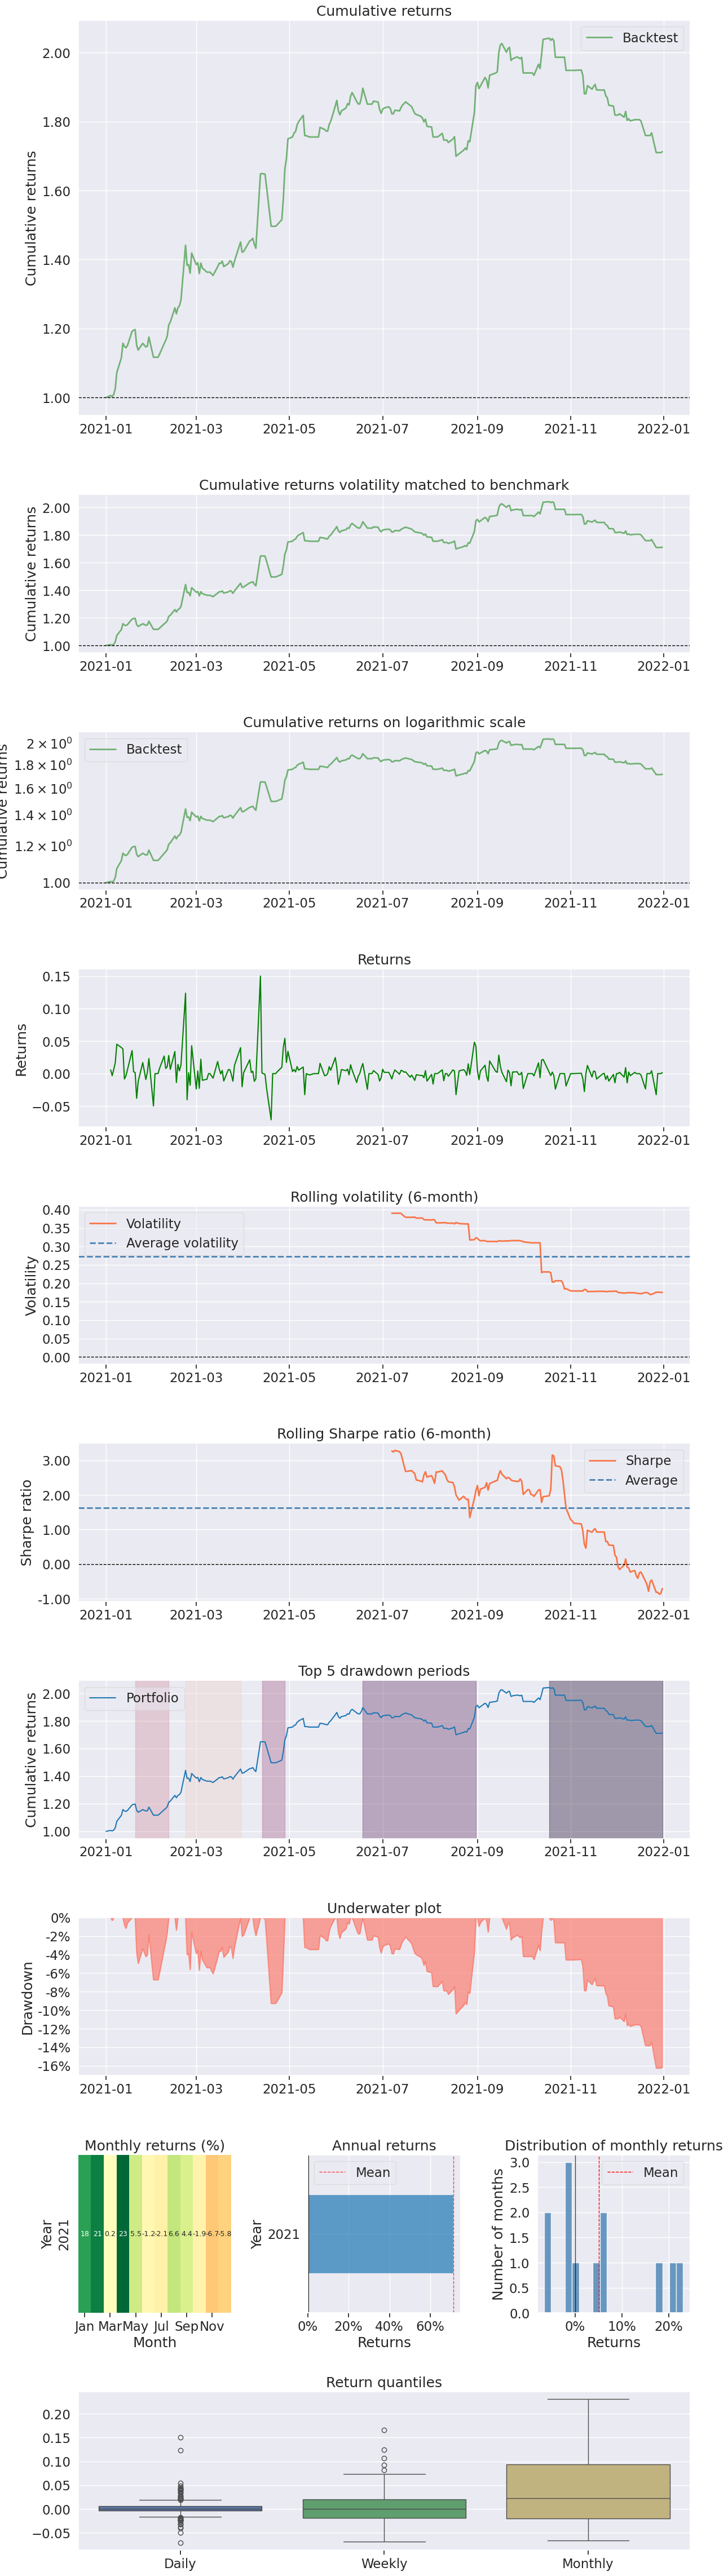

In [79]:
# Create a Pyfolio tear sheet
import pyfolio as pf
pf.create_full_tear_sheet(returns=daily_returns['pct_change'], benchmark_rets=None)

In [ ]:
#convert to dataframe
drawdown_table_df = pd.DataFrame(drawdown_table)


In [ ]:
drawdown_table_df.to_csv('D:/final backtests/final/drawdown_table.csv')

In [ ]:
print(drawdown_table)

      Net drawdown in %  Peak date Valley date Recovery date Duration
0             11.328067 2019-05-14  2019-05-31    2019-07-01       35
1              5.039597 2019-02-25  2019-03-05    2019-03-12       12
2              4.936834 2019-01-29  2019-01-31    2019-02-18       15
3              4.733819 2019-04-23  2019-04-25    2019-05-09       13
4              4.584056 2022-02-17  2022-03-14    2022-04-19       44
...                 ...        ...         ...           ...      ...
27140               NaN        NaT         NaT           NaT      NaN
27141               NaN        NaT         NaT           NaT      NaN
27142               NaN        NaT         NaT           NaT      NaN
27143               NaN        NaT         NaT           NaT      NaN
27144               NaN        NaT         NaT           NaT      NaN

[27145 rows x 5 columns]


In [ ]:
import pandas as pd
import numpy as np
from itertools import groupby




# Convert date column to datetime
daily_returns['date'] = pd.to_datetime(daily_returns['date'])

# Total Trades
total_trades = len(daily_returns)

# Profitable Trades
profitable_trades = daily_returns[daily_returns['totalPL'] > 0]['totalPL'].count()

# Losing Trades
losing_trades = daily_returns[daily_returns['totalPL'] < 0]['totalPL'].count()

# Avg. Trades Per Month
avg_trades_per_month = daily_returns.resample('M', on='date')['totalPL'].count().mean()

# Helper function to calculate streaks with dates
def calculate_streaks(daily_returns, condition):
    streaks = []
    streak_start = None
    streak_length = 0

    for i, row in daily_returns.iterrows():
        if condition(row['totalPL']):
            if streak_length == 0:
                streak_start = row['date']
            streak_length += 1
        else:
            if streak_length > 0:
                streaks.append((streak_start, row['date'] - pd.Timedelta(days=1), streak_length))
            streak_length = 0

    if streak_length > 0:
        streaks.append((streak_start, row['date'], streak_length))

    return streaks

# Max Profitable Streak
profitable_streaks = calculate_streaks(daily_returns, lambda x: x > 0)
max_profitable_streak = max(profitable_streaks, key=lambda x: x[2], default=(None, None, 0))

# Max Losing Streak
losing_streaks = calculate_streaks(daily_returns, lambda x: x < 0)
max_losing_streak = max(losing_streaks, key=lambda x: x[2], default=(None, None, 0))

# Hit Ratio
hit_ratio = profitable_trades / total_trades if total_trades > 0 else 0

# Risk Reward
avg_profit_per_trade = daily_returns[daily_returns['totalPL'] > 0]['totalPL'].mean()
avg_loss_per_trade = daily_returns[daily_returns['totalPL'] < 0]['totalPL'].mean()

risk_reward_ratio = abs(avg_profit_per_trade / avg_loss_per_trade) if avg_loss_per_trade != 0 else float('inf')

# Print the metrics
print(f"Total Trades: {total_trades}")
print(f"Profitable Trades: {profitable_trades}")
print(f"Losing Trades: {losing_trades}")
print(f"Avg. Trades Per Month: {avg_trades_per_month}")
print(f"Hit Ratio: {hit_ratio}")
print(f"Risk Reward Ratio: {risk_reward_ratio}")

# Print streak details
print(f"Max Profitable Streak: {max_profitable_streak[2]} days (from {max_profitable_streak[0]} to {max_profitable_streak[1]})")
print(f"Max Losing Streak: {max_losing_streak[2]} days (from {max_losing_streak[0]} to {max_losing_streak[1]})")

# Print all streaks
print("\nProfitable Streaks:")
for start, end, length in profitable_streaks:
    print(f"Streak of {length} days from {start} to {end}")

print("\nLosing Streaks:")
for start, end, length in losing_streaks:
    print(f"Streak of {length} days from {start} to {end}")


Total Trades: 1327
Profitable Trades: 853
Losing Trades: 429
Avg. Trades Per Month: 20.415384615384614
Hit Ratio: 0.6428033157498116
Risk Reward Ratio: 1.1738889546760816
Max Profitable Streak: 15 days (from 2023-05-05 00:00:00 to 2023-05-25 00:00:00)
Max Losing Streak: 6 days (from 2020-07-10 00:00:00 to 2020-07-19 00:00:00)

Profitable Streaks:
Streak of 2 days from 2019-01-28 00:00:00 to 2019-01-29 00:00:00
Streak of 2 days from 2019-02-11 00:00:00 to 2019-02-12 00:00:00
Streak of 3 days from 2019-02-14 00:00:00 to 2019-02-18 00:00:00
Streak of 4 days from 2019-02-20 00:00:00 to 2019-02-25 00:00:00
Streak of 1 days from 2019-03-01 00:00:00 to 2019-03-04 00:00:00
Streak of 13 days from 2019-03-06 00:00:00 to 2019-03-25 00:00:00
Streak of 1 days from 2019-03-28 00:00:00 to 2019-03-28 00:00:00
Streak of 1 days from 2019-04-01 00:00:00 to 2019-04-01 00:00:00
Streak of 3 days from 2019-04-05 00:00:00 to 2019-04-09 00:00:00
Streak of 3 days from 2019-04-11 00:00:00 to 2019-04-15 00:00:00


C:\Users\rahul\AppData\Local\Temp\ipykernel_13056\4240040003.py:21: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  avg_trades_per_month = daily_returns.resample('M', on='date')['totalPL'].count().mean()


In [ ]:
avg_profit_per_trade

1706.7291910902695

In [ ]:
avg_loss_per_trade

-1453.9102564102564